# HST Example
Example of the `dfcosmic` algorithm compared to the original `IRAF` implementation as well as `astroscrappy` and `lacosmic`. 

We use the same *HST* WFPC2 image of galaxy cluster MS 1137+67 as shown in Figure 6 of van Dokkum 2001.

In [1]:
from astropy.io import fits
import numpy as np
from lacosmic import remove_cosmics
from dfcosmic import lacosmic as df_lacosmic
from astroscrappy import detect_cosmics
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

In [2]:
# Get data and pre-computed IRAF Mask
data = fits.getdata("./hst_im_ext3.fits").astype(np.float32)
iraf_mask = fits.getdata("./hst_im_ext3_iraf_mask.fits").astype(np.uint8)

In [3]:
# Compute dfcosmic mask
df_cosmic_result, df_cosmic_mask = df_lacosmic(
    data,
    sigclip=4.5,
    sigfrac=0.3,
    objlim=4,
    readnoise=5,
    gain=7,
    niter=4,
    device="cpu",
    use_cpp=True,
    verbose=False,
)

In [4]:
# Compute astroscrappy mask with sepmed=True
astroscrappy_mask, astroscrappy_result = detect_cosmics(
    data, sigclip=4.5, sigfrac=0.3, objlim=4, readnoise=5, gain=7, niter=4, sepmed=True
)

In [5]:
# Compute astroscrappy mask with sepmed=False
astroscrappy_nosepmed_mask, astroscrappy_nosepmed_result = detect_cosmics(
    data, sigclip=4.5, sigfrac=0.3, objlim=4, readnoise=5, gain=7, niter=4, sepmed=False
)

In [6]:
# Compute lacosmic
lacosmic_result, lacosmic_mask = remove_cosmics(
    data=data,
    contrast=4,
    cr_threshold=0.3,
    neighbor_threshold=4.5,
    readnoise=5,
    effective_gain=7,
    maxiter=4,
)

INFO: Iteration 1: Found 12245 cosmic-ray pixels, Total: 12245 [lacosmic.core]
INFO: Iteration 2: Found 4237 cosmic-ray pixels, Total: 16482 [lacosmic.core]
INFO: Iteration 3: Found 592 cosmic-ray pixels, Total: 17074 [lacosmic.core]
INFO: Iteration 4: Found 82 cosmic-ray pixels, Total: 17156 [lacosmic.core]


/tmp/ipykernel_1590414/1449488815.py:9: RuntimeWarning: invalid value encountered in log10
  np.log10(data)[y_min:y_max, x_min:x_max],


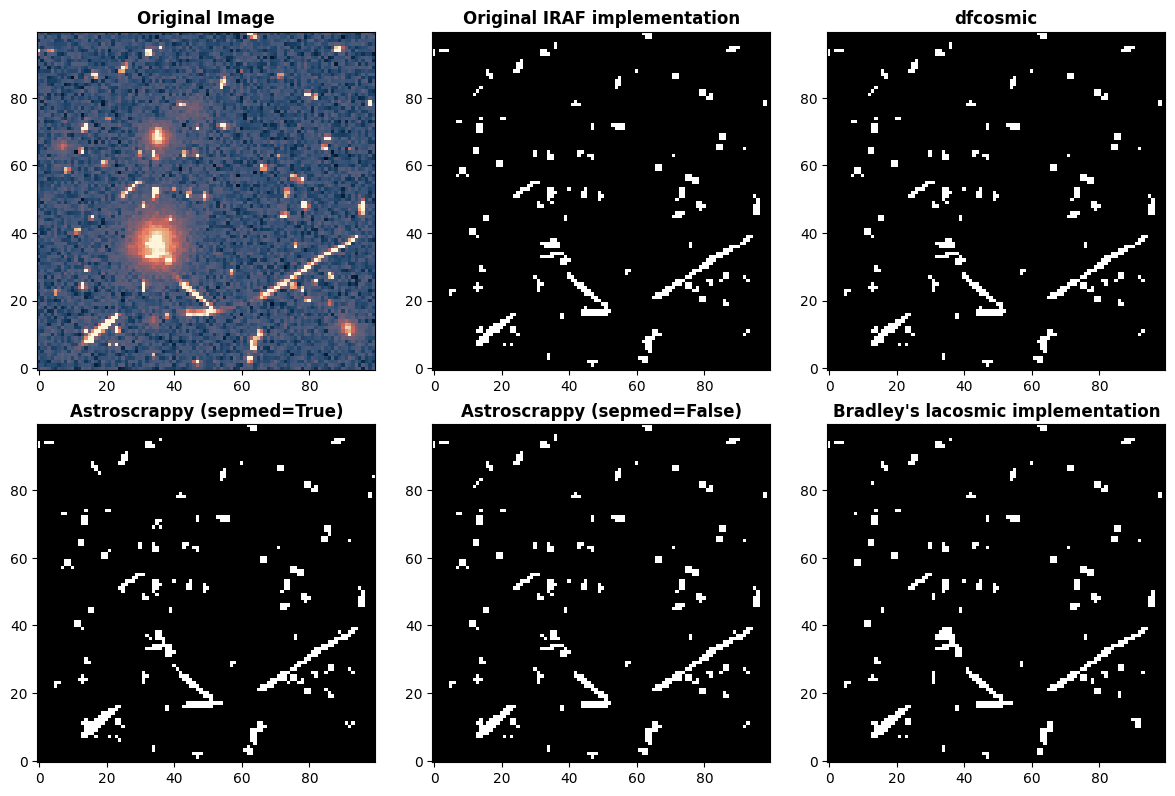

In [7]:
# Plot small region
x_min = 580
x_max = 680
y_min = 400
y_max = 500

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
axs[0, 0].imshow(
    np.log10(data)[y_min:y_max, x_min:x_max],
    cmap=cmc.lipari,
    origin="lower",
    vmin=1,
    vmax=2,
)
axs[0, 0].set_title("Original Image", fontweight="bold")

axs[0, 1].imshow(iraf_mask[y_min:y_max, x_min:x_max], cmap=cmc.grayC, origin="lower")
axs[0, 1].set_title("Original IRAF implementation", fontweight="bold")

axs[0, 2].imshow(
    df_cosmic_mask[y_min:y_max, x_min:x_max], cmap=cmc.grayC, origin="lower"
)
axs[0, 2].set_title("dfcosmic", fontweight="bold")

axs[1, 0].imshow(
    astroscrappy_mask[y_min:y_max, x_min:x_max], cmap=cmc.grayC, origin="lower"
)
axs[1, 0].set_title("Astroscrappy (sepmed=True)", fontweight="bold")

axs[1, 1].imshow(
    astroscrappy_nosepmed_mask[y_min:y_max, x_min:x_max], cmap=cmc.grayC, origin="lower"
)
axs[1, 1].set_title("Astroscrappy (sepmed=False)", fontweight="bold")

axs[1, 2].imshow(
    lacosmic_mask[y_min:y_max, x_min:x_max], cmap=cmc.grayC, origin="lower"
)
axs[1, 2].set_title("Bradley's lacosmic implementation", fontweight="bold")

plt.tight_layout()
plt.savefig("example_hst.png", dpi=600)